In [1]:
import pandas as pd
import numpy as numpy
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
%matplotlib notebook

In [2]:
top_30 = pd.read_csv('top_30.csv')
top_30

,Unnamed: 0,team,home_game_count,away_team,away_game_count,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game,total_goals,total_games,results,winning_rate
0,35,Brazil,496.0,Brazil,377.0,1182.0,366.0,1548.0,346.0,702.0,1048.0,1884.0,873.0,571.0,0.654066
1,103,Germany,407.0,Germany,349.0,960.0,364.0,1324.0,390.0,654.0,1044.0,1614.0,756.0,455.0,0.601852
2,254,Spain,325.0,Spain,294.0,734.0,236.0,970.0,302.0,480.0,782.0,1214.0,619.0,363.0,0.586430
3,84,England,380.0,England,362.0,785.0,307.0,1092.0,350.0,621.0,971.0,1406.0,742.0,407.0,0.548518
4,127,Iran,277.0,Iran,215.0,582.0,183.0,765.0,212.0,323.0,535.0,905.0,492.0,269.0,0.546748
5,71,Czech Republic,142.0,Czech Republic,149.0,306.0,122.0,428.0,163.0,217.0,380.0,523.0,291.0,157.0,0.539519
6,66,Croatia,144.0,Croatia,153.0,287.0,117.0,404.0,165.0,222.0,387.0,509.0,297.0,159.0,0.535354
7,95,France,382.0,France,278.0,769.0,328.0,1097.0,325.0,405.0,730.0,1174.0,660.0,353.0,0.534848
8,184,New Caledonia,133.0,New Caledonia,94.0,383.0,159.0,542.0,163.0,231.0,394.0,614.0,227.0,120.0,0.528634
9,251,South Korea,463.0,South Korea,387.0,921.0,342.0,1263.0,423.0,565.0,988.0,1486.0,850.0,448.0,0.527059


In [3]:
top_30['total_lost_goals']=top_30['home_lost_goals'] + top_30['away_lost_goals']
top_30

,Unnamed: 0,team,home_game_count,away_team,away_game_count,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game,total_goals,total_games,results,winning_rate,total_lost_goals
0,35,Brazil,496.0,Brazil,377.0,1182.0,366.0,1548.0,346.0,702.0,1048.0,1884.0,873.0,571.0,0.654066,712.0
1,103,Germany,407.0,Germany,349.0,960.0,364.0,1324.0,390.0,654.0,1044.0,1614.0,756.0,455.0,0.601852,754.0
2,254,Spain,325.0,Spain,294.0,734.0,236.0,970.0,302.0,480.0,782.0,1214.0,619.0,363.0,0.586430,538.0
3,84,England,380.0,England,362.0,785.0,307.0,1092.0,350.0,621.0,971.0,1406.0,742.0,407.0,0.548518,657.0
4,127,Iran,277.0,Iran,215.0,582.0,183.0,765.0,212.0,323.0,535.0,905.0,492.0,269.0,0.546748,395.0
5,71,Czech Republic,142.0,Czech Republic,149.0,306.0,122.0,428.0,163.0,217.0,380.0,523.0,291.0,157.0,0.539519,285.0
6,66,Croatia,144.0,Croatia,153.0,287.0,117.0,404.0,165.0,222.0,387.0,509.0,297.0,159.0,0.535354,282.0
7,95,France,382.0,France,278.0,769.0,328.0,1097.0,325.0,405.0,730.0,1174.0,660.0,353.0,0.534848,653.0
8,184,New Caledonia,133.0,New Caledonia,94.0,383.0,159.0,542.0,163.0,231.0,394.0,614.0,227.0,120.0,0.528634,322.0
9,251,South Korea,463.0,South Korea,387.0,921.0,342.0,1263.0,423.0,565.0,988.0,1486.0,850.0,448.0,0.527059,765.0


In [4]:
top_30['net_goals']=top_30['total_goals'] - top_30['total_lost_goals']
top_30

,Unnamed: 0,team,home_game_count,away_team,away_game_count,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game,total_goals,total_games,results,winning_rate,total_lost_goals,net_goals
0,35,Brazil,496.0,Brazil,377.0,1182.0,366.0,1548.0,346.0,702.0,1048.0,1884.0,873.0,571.0,0.654066,712.0,1172.0
1,103,Germany,407.0,Germany,349.0,960.0,364.0,1324.0,390.0,654.0,1044.0,1614.0,756.0,455.0,0.601852,754.0,860.0
2,254,Spain,325.0,Spain,294.0,734.0,236.0,970.0,302.0,480.0,782.0,1214.0,619.0,363.0,0.586430,538.0,676.0
3,84,England,380.0,England,362.0,785.0,307.0,1092.0,350.0,621.0,971.0,1406.0,742.0,407.0,0.548518,657.0,749.0
4,127,Iran,277.0,Iran,215.0,582.0,183.0,765.0,212.0,323.0,535.0,905.0,492.0,269.0,0.546748,395.0,510.0
5,71,Czech Republic,142.0,Czech Republic,149.0,306.0,122.0,428.0,163.0,217.0,380.0,523.0,291.0,157.0,0.539519,285.0,238.0
6,66,Croatia,144.0,Croatia,153.0,287.0,117.0,404.0,165.0,222.0,387.0,509.0,297.0,159.0,0.535354,282.0,227.0
7,95,France,382.0,France,278.0,769.0,328.0,1097.0,325.0,405.0,730.0,1174.0,660.0,353.0,0.534848,653.0,521.0
8,184,New Caledonia,133.0,New Caledonia,94.0,383.0,159.0,542.0,163.0,231.0,394.0,614.0,227.0,120.0,0.528634,322.0,292.0
9,251,South Korea,463.0,South Korea,387.0,921.0,342.0,1263.0,423.0,565.0,988.0,1486.0,850.0,448.0,0.527059,765.0,721.0


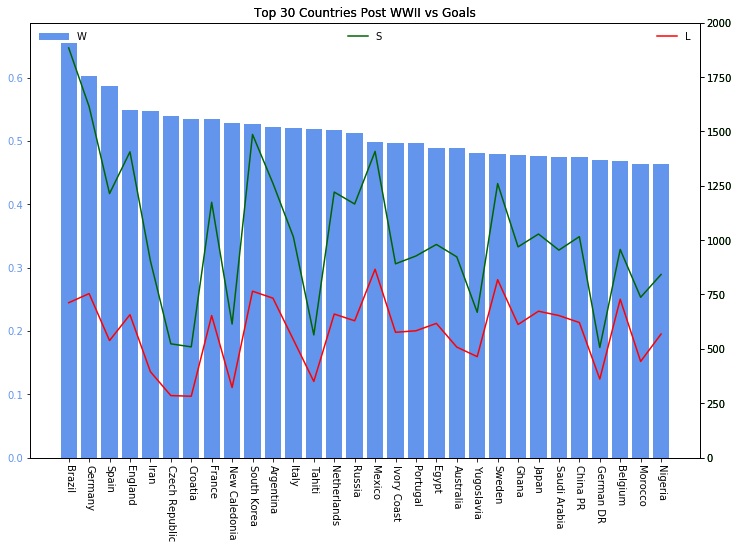

<Figure size 432x288 with 0 Axes>

In [5]:
x = top_30['team']
y = top_30['winning_rate']
z = top_30['total_goals']
zz = top_30['total_lost_goals']

fig, ax1 = plt.subplots(figsize = (12,8))

ax1.bar(x,y,color='cornflowerblue',align='center')
ax1.tick_params(axis='y', labelcolor='cornflowerblue')
ax1.tick_params(axis='x', labelrotation=-90,labelsize=10)
ax1.set_title('Top 30 Countries Post WWII vs Goals')
ax1.legend('Win Rate',loc=2,fontsize=10,handlelength = 3,frameon=False)

ax2 = ax1.twinx()
ax2.plot(x,z,color='darkgreen')
ax2.set_ylim(0,2000)
ax2.tick_params(axis='y', labelcolor='darkgreen')
ax2.legend('Scored',loc=9,fontsize=10,frameon=False)

ax3 = ax1.twinx()
ax3.plot(x,zz,color='r')
ax3.set_ylim(0,2000)
ax3.tick_params(axis='x', labelrotation=-90,labelsize=10)
ax3.legend('Lost',loc=1,fontsize=10,frameon=False)

plt.title('Top 30 Countries Post WWII vs Goals')
plt.show()

plt.savefig('figures/top30_1.png')

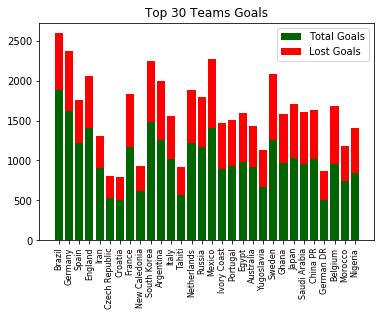

<Figure size 432x288 with 0 Axes>

In [6]:


p1 = Rectangle((0, 0), 1, 1, fc="darkgreen")
p2 = Rectangle((0, 0), 1, 1, fc="r")

i = top_30['team']
j = top_30['total_goals']
k = top_30['total_lost_goals']

plt.bar(i,j,color='darkgreen',tick_label=i)
plt.bar(i,k,color='r',bottom=j)
plt.xticks(rotation=90,fontsize=8)
plt.title('Top 30 Teams Goals')
plt.legend([p1, p2], ['Total Goals', 'Lost Goals'])
plt.show()
plt.savefig('figures/scored_lost_goals.png')

In [10]:
top_30['goals_per_game']=top_30['total_goals'] / top_30['total_games']
top_30['goals_lost_per_game']=top_30['total_lost_goals'] / top_30['total_games']
top_30['net_goals_per_game']=top_30['net_goals'] / top_30['total_games']

In [11]:
top_30.head()

,Unnamed: 0,team,home_game_count,away_team,away_game_count,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game,total_goals,total_games,results,winning_rate,total_lost_goals,net_goals,goals_per_game,goals_lost_per_game,net_goals_per_game
0,35,Brazil,496.0,Brazil,377.0,1182.0,366.0,1548.0,346.0,702.0,1048.0,1884.0,873.0,571.0,0.654066,712.0,1172.0,2.158076,0.815578,1.342497
1,103,Germany,407.0,Germany,349.0,960.0,364.0,1324.0,390.0,654.0,1044.0,1614.0,756.0,455.0,0.601852,754.0,860.0,2.134921,0.997354,1.137566
2,254,Spain,325.0,Spain,294.0,734.0,236.0,970.0,302.0,480.0,782.0,1214.0,619.0,363.0,0.586430,538.0,676.0,1.961228,0.869144,1.092084
3,84,England,380.0,England,362.0,785.0,307.0,1092.0,350.0,621.0,971.0,1406.0,742.0,407.0,0.548518,657.0,749.0,1.894879,0.885445,1.009434
4,127,Iran,277.0,Iran,215.0,582.0,183.0,765.0,212.0,323.0,535.0,905.0,492.0,269.0,0.546748,395.0,510.0,1.839431,0.802846,1.036585


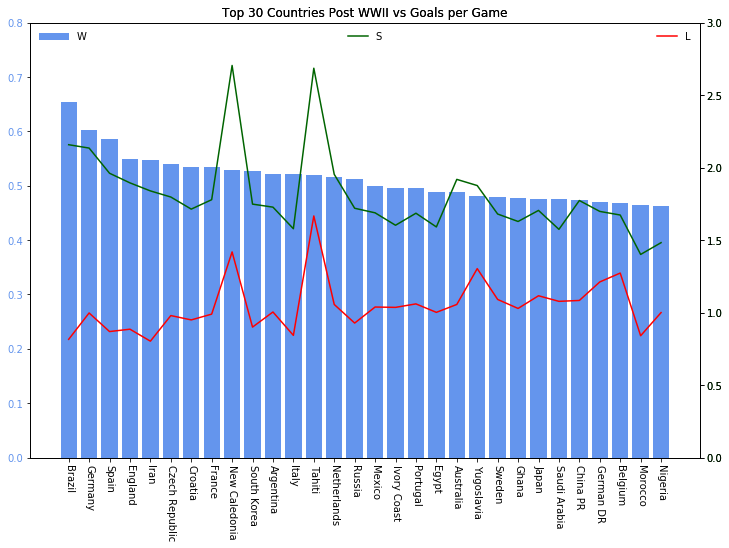

<Figure size 432x288 with 0 Axes>

In [13]:
x2 = top_30['team']
y1 = top_30['winning_rate']
y2 = top_30['goals_per_game']
y3 = top_30['goals_lost_per_game']

fig, ax4 = plt.subplots(figsize = (12,8))

ax4.bar(x2,y1,color='cornflowerblue',align='center')
ax4.tick_params(axis='y', labelcolor='cornflowerblue')
ax4.tick_params(axis='x', labelrotation=-90,labelsize=10)
ax4.set_ylim(0,0.8)
ax4.set_title('Top 30 Countries Post WWII vs Goals per Game')
ax4.legend('Win Rate',loc=2,fontsize=10,handlelength = 3,frameon=False)

ax5 = ax4.twinx()
ax5.plot(x2,y2,color='darkgreen')
ax5.tick_params(axis='y', labelcolor='darkgreen')
ax5.set_ylim(0,3)
ax5.legend('Scored',loc=9,fontsize=10,frameon=False)

ax6 = ax4.twinx()
ax6.plot(x2,y3,color='r')
ax6.tick_params(axis='x', labelrotation=-90,labelsize=10)
ax6.set_ylim(0,3)
ax6.legend('Lost',loc=1,fontsize=10,frameon=False)

plt.title('Top 30 Countries Post WWII vs Goals per Game')
plt.show()

plt.savefig('figures/top30_2.png')

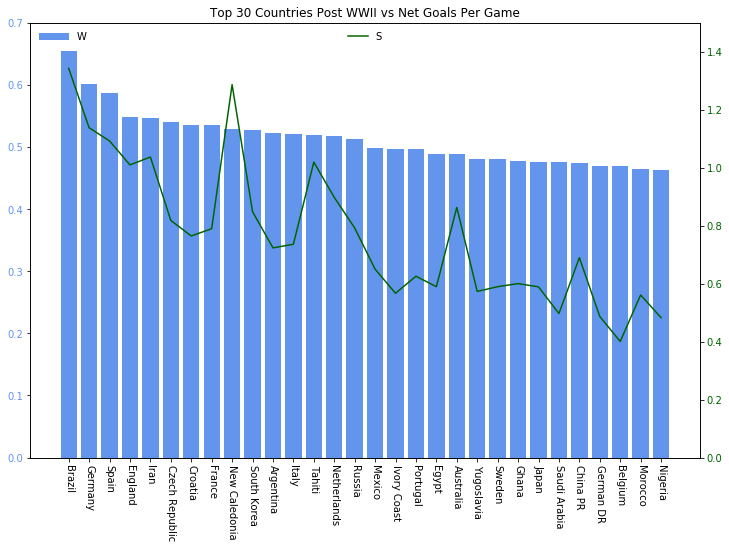

In [12]:
x3 = top_30['team']
y4 = top_30['winning_rate']
y5 = top_30['net_goals_per_game']

fig, ax7 = plt.subplots(figsize = (12,8))

ax7.bar(x3,y4,color='cornflowerblue',align='center')
ax7.tick_params(axis='y', labelcolor='cornflowerblue')
ax7.tick_params(axis='x', labelrotation=-90,labelsize=10)
ax7.set_ylim(0,0.7)
ax7.set_title('Top 30 Countries Post WWII vs Net Goals Per Game')
ax7.legend('Win Rate',loc=2,fontsize=10,handlelength = 3,frameon=False)

ax8 = ax7.twinx()
ax8.plot(x3,y5,color='darkgreen')
ax8.tick_params(axis='y', labelcolor='darkgreen')
ax8.set_ylim(0,1.5)
ax8.legend('Scored',loc=9,fontsize=10,frameon=False)

plt.savefig('figures/winrate_vs_netgoals.png')